### Comparisons of Loads vs Temp and fitting them

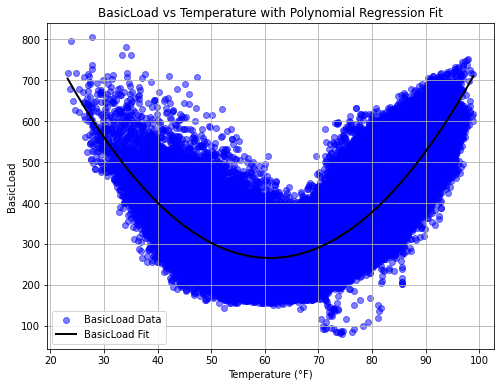

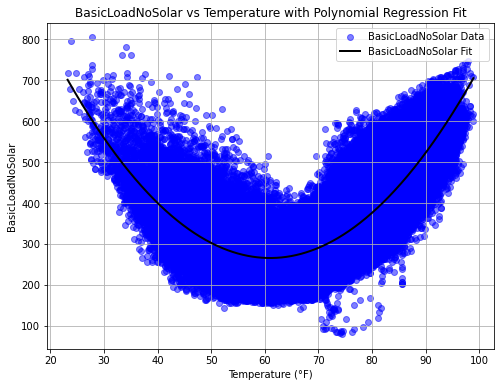

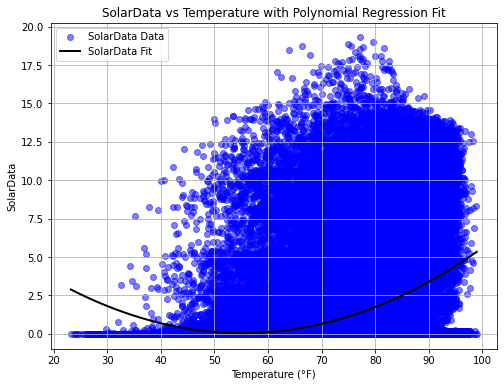

Fitted function for BasicLoad:
        2
0.3076 x - 37.48 x + 1408
Fitted function for BasicLoadNoSolar:
        2
0.3048 x - 37.18 x + 1399
Fitted function for SolarData:
          2
0.002768 x - 0.3057 x + 8.489


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy.polynomial.polynomial import Polynomial

# Read the CSV file
data = pd.read_csv('merged_load_weather_data.csv')

# Columns of interest
columns_to_plot = ["BasicLoad", "BasicLoadNoSolar", "SolarData"]
temperature = data["Temp"]

# Initialize a dictionary to store fitted functions
fitted_functions = {}

for column in columns_to_plot:
    load = data[column]

    # Clean data: remove rows with NaN or infinite values
    valid_data = ~np.isnan(temperature) & ~np.isnan(load) & np.isfinite(temperature) & np.isfinite(load)
    clean_temperature = temperature[valid_data]
    clean_load = load[valid_data]

    # Fit a 2nd-degree polynomial (or modify as needed)
    coeffs = np.polyfit(clean_temperature, clean_load, 2)
    fitted_poly = np.poly1d(coeffs)

    # Store the function
    fitted_functions[column] = fitted_poly

    # Generate fitted values for the temperature range
    temperature_fit = np.linspace(clean_temperature.min(), clean_temperature.max(), 500)
    load_fit = fitted_poly(temperature_fit)

    # Plot
    plt.figure(figsize=(8, 6))
    plt.scatter(clean_temperature, clean_load, color="blue", alpha=0.5, label=f"{column} Data")
    plt.plot(temperature_fit, load_fit, color="black", linewidth=2, label=f"{column} Fit")
    plt.title(f"{column} vs Temperature with Polynomial Regression Fit")
    plt.xlabel("Temperature (°F)")
    plt.ylabel(column)
    plt.legend()
    plt.grid(True)
    plt.show()

# Output the fitted functions
for column, function in fitted_functions.items():
    print(f"Fitted function for {column}:")
    print(function)


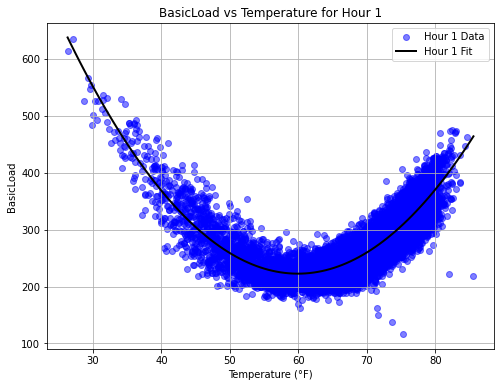

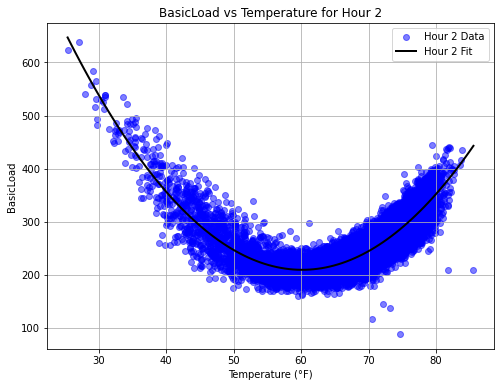

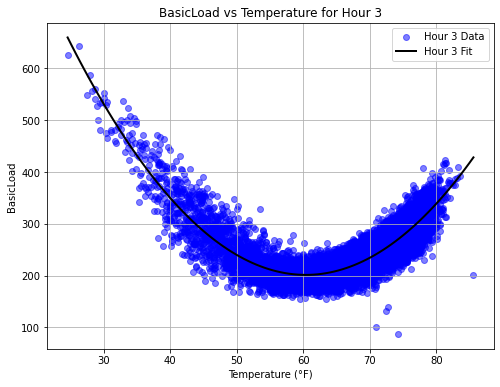

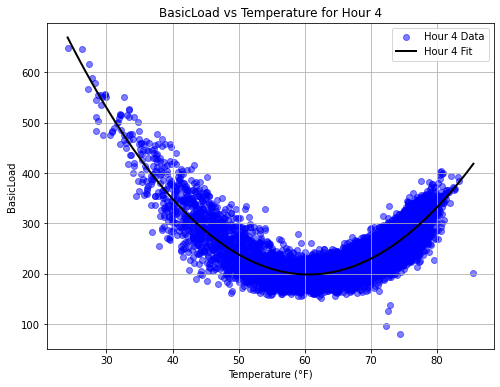

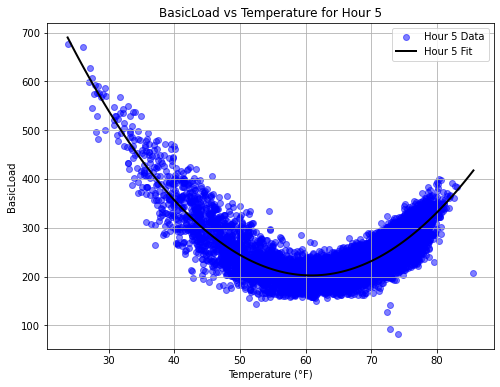

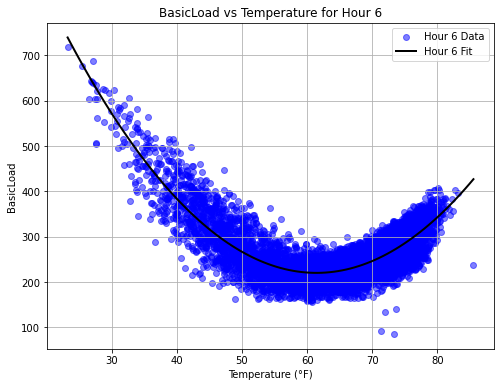

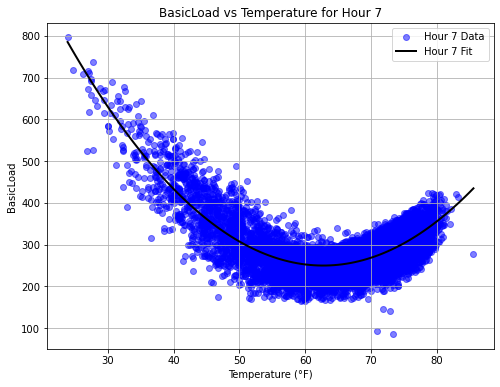

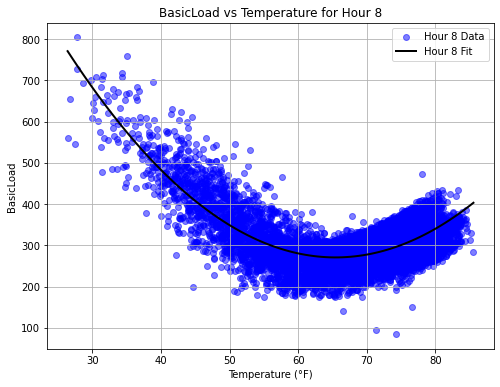

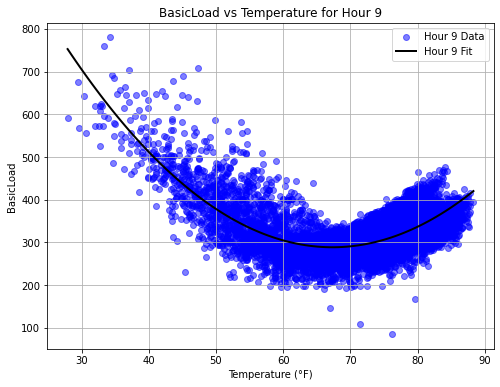

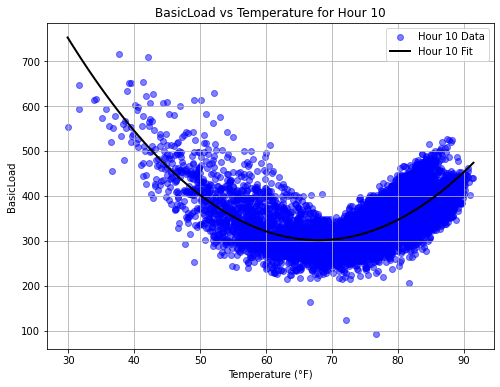

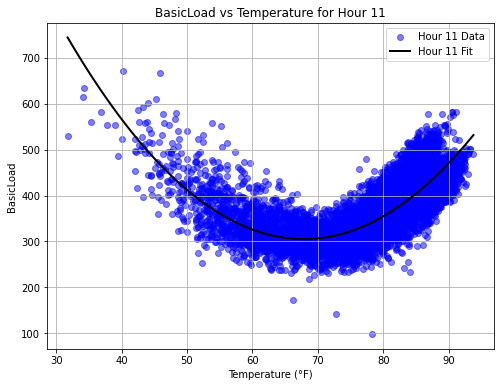

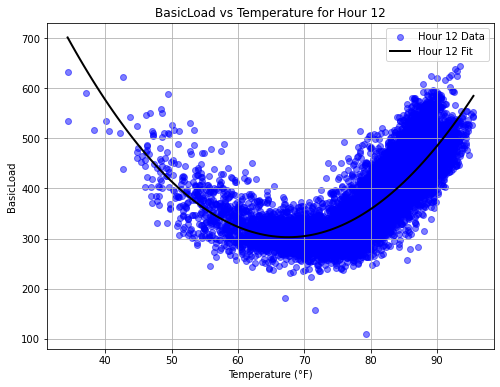

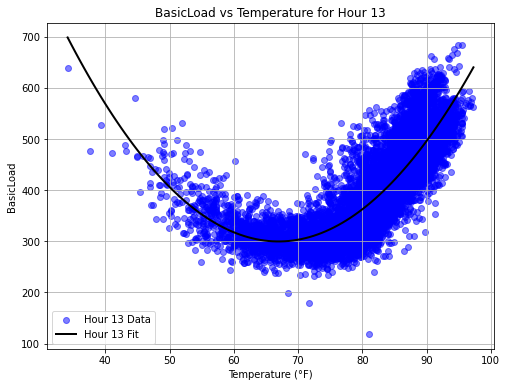

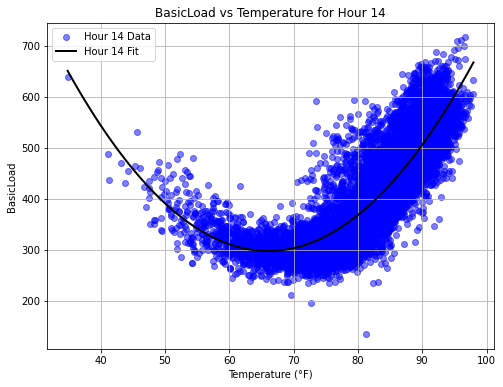

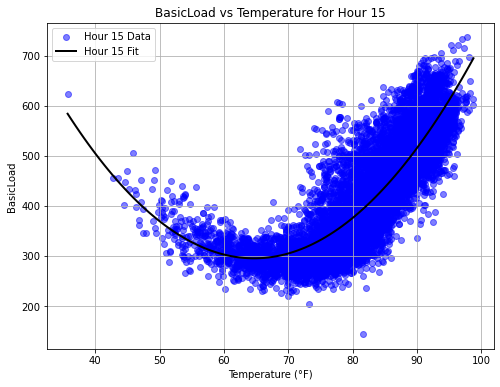

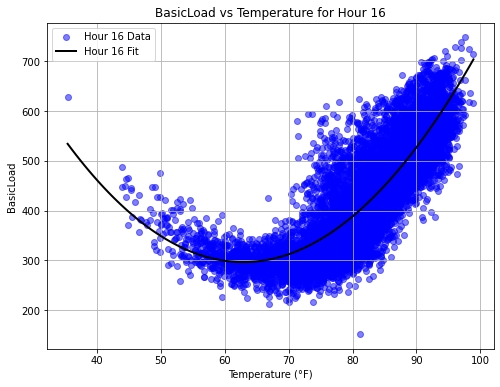

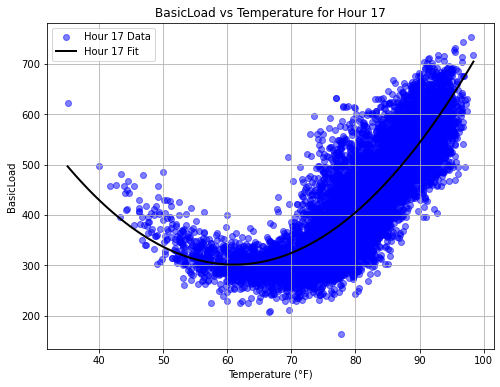

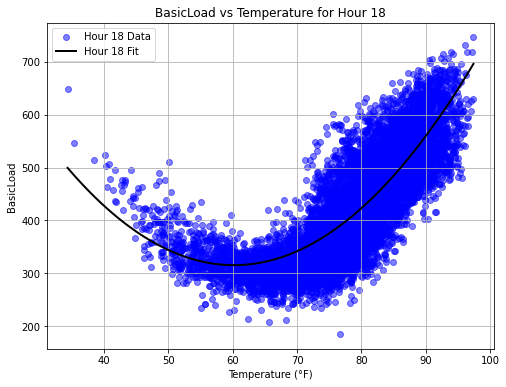

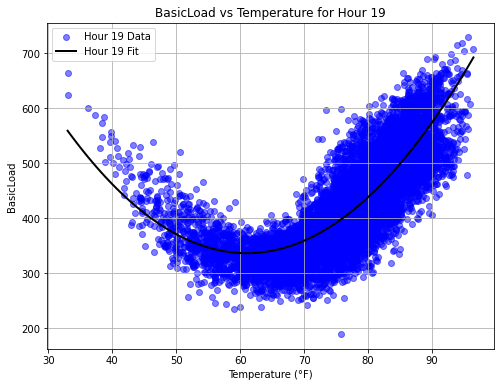

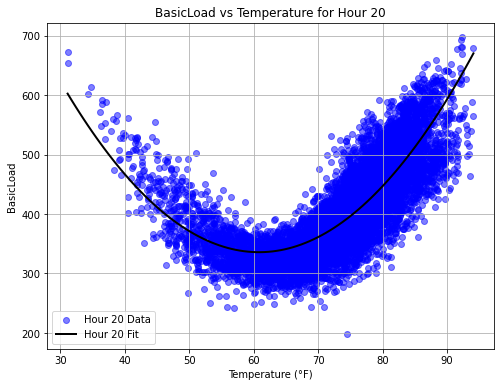

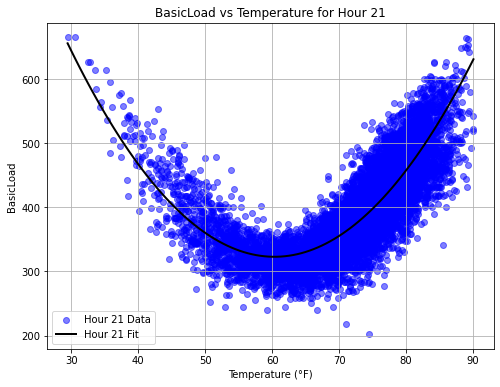

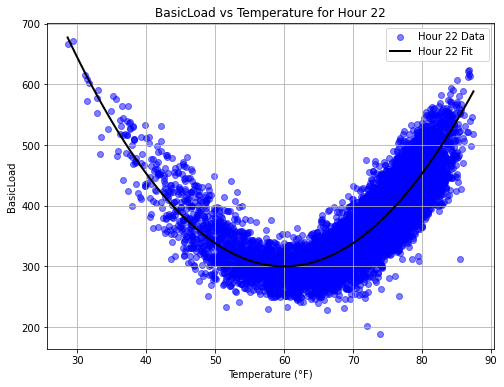

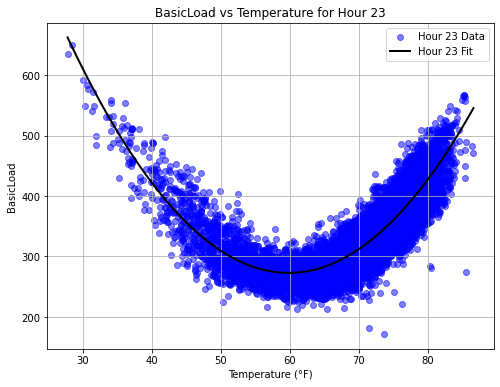

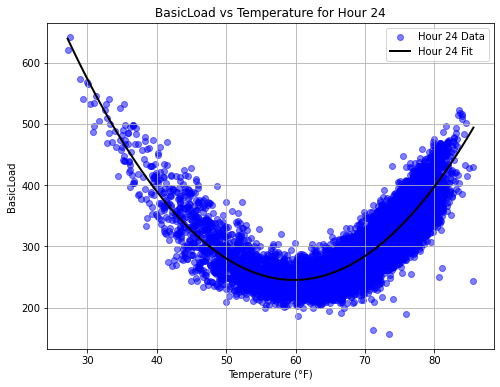


Polynomials for each hour:
Hour 1:         2
0.3668 x - 43.96 x + 1540
Hour 2:         2
0.3626 x - 43.63 x + 1521
Hour 3:         2
0.3582 x - 43.25 x + 1507
Hour 4:         2
0.3536 x - 42.86 x + 1497
Hour 5:         2
0.3535 x - 43.04 x + 1512
Hour 6:         2
0.3554 x - 43.67 x + 1561
Hour 7:         2
0.3552 x - 44.56 x + 1648
Hour 8:         2
0.3275 x - 42.86 x + 1673
Hour 9:         2
0.2987 x - 40.23 x + 1643
Hour 10:         2
0.3113 x - 42.29 x + 1738
Hour 11:        2
0.337 x - 45.72 x + 1856
Hour 12:         2
0.3612 x - 48.79 x + 1950
Hour 13:       2
0.37 x - 49.56 x + 1959
Hour 14:         2
0.3632 x - 47.99 x + 1883
Hour 15:         2
0.3435 x - 44.43 x + 1732
Hour 16:         2
0.3141 x - 39.51 x + 1539
Hour 17:         2
0.2892 x - 35.32 x + 1380
Hour 18:         2
0.2753 x - 33.14 x + 1313
Hour 19:        2
0.283 x - 34.54 x + 1391
Hour 20:         2
0.3021 x - 36.74 x + 1453
Hour 21:         2
0.3491 x - 42.12 x + 1594
Hour 22:        2
0.383 x - 45.95 x + 1678
H

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
file_path = "merged_load_weather_data.csv"
data = pd.read_csv(file_path)

# Ensure the 'Hour' column is numeric
data['Hour'] = pd.to_numeric(data['Hour'], errors='coerce')

# Prepare to store polynomials
hourly_polynomials = {}

# Loop over each hour and fit a polynomial
for hour in range(1, 25):  # Hours 1 to 24
    hourly_data = data[data['Hour'] == hour]
    temperature = hourly_data['Temp']
    load = hourly_data['BasicLoad']
    
    # Combine temperature and load into a single DataFrame for consistent filtering
    hourly_df = pd.DataFrame({'Temp': temperature, 'BasicLoad': load}).dropna()

    # Check if there is sufficient data for this hour
    if len(hourly_df) < 3:
        print(f"Not enough valid data to fit for Hour {hour}")
        continue

    # Check if the temperature and load have sufficient variance
    if hourly_df['Temp'].std() < 1e-6 or hourly_df['BasicLoad'].std() < 1e-6:
        print(f"Data for Hour {hour} has insufficient variance to fit a polynomial.")
        continue

    try:
        # Fit a 2nd-degree polynomial
        coeffs = np.polyfit(hourly_df['Temp'], hourly_df['BasicLoad'], 2)
        fitted_poly = np.poly1d(coeffs)
        
        # Store the polynomial for this hour
        hourly_polynomials[hour] = fitted_poly

        # Plot the data and fit
        plt.figure(figsize=(8, 6))
        plt.scatter(hourly_df['Temp'], hourly_df['BasicLoad'], label=f"Hour {hour} Data", color='blue', alpha=0.5)
        temp_range = np.linspace(hourly_df['Temp'].min(), hourly_df['Temp'].max(), 100)
        plt.plot(temp_range, fitted_poly(temp_range), label=f"Hour {hour} Fit", color='black', linewidth=2)
        plt.title(f"BasicLoad vs Temperature for Hour {hour}")
        plt.xlabel("Temperature (°F)")
        plt.ylabel("BasicLoad")
        plt.legend()
        plt.grid()
        plt.show()
    except np.linalg.LinAlgError as e:
        print(f"Error fitting polynomial for Hour {hour}: {e}")

# Output the polynomials
print("\nPolynomials for each hour:")
for hour, poly in hourly_polynomials.items():
    print(f"Hour {hour}: {poly}")
